## Redes Neuronales Artificiales Avanzadas
### Dr. Carlos Alberto Duchanoy Martínez 
### ------ CIDETEC --------
### Miguel Angel Mendoza Guadarrama
### Proyecto final: entrenamiento de una red neuronal para clasificaciòn de personalidad
#### Personalidad 5

se importan las biblitecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


importacion del dataset y las etiquetas para cada una de las personalidades

In [2]:
data_img = np.load("dataset_img.npy")
label1 = np.load("label1.npy")
label2 = np.load("label2.npy")
label3 = np.load("label3.npy")
label4 = np.load("label4.npy")
label5 = np.load("label5.npy")

In [3]:
print("Tamaño de dataset",data_img.shape)
print("Etiquetas",label4.shape)

Tamaño de dataset (2139, 120000)
Etiquetas (2139, 7)


Etiquetas de las 5 personalidades para la imagen: 0
[0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0.]


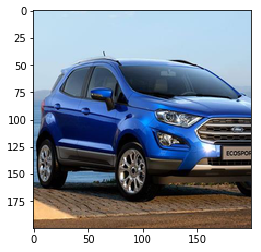

In [4]:
img_indice = 0
img = np.reshape(data_img[img_indice], (200,200,3))
plt.imshow(img)
print("Etiquetas de las 5 personalidades para la imagen:", (img_indice))
print(label1[img_indice])
print(label2[img_indice])
print(label3[img_indice])
print(label4[img_indice])
print(label5[img_indice])

Division del dataset en 80% para training y 20% para test

In [5]:
training_img = data_img[0:int(0.8*len(data_img))]
test_img = data_img[int(0.8*len(data_img)):]

lbl1_training = label1[0:int(0.8*len(label1))]
lbl2_training = label2[0:int(0.8*len(label2))]
lbl3_training = label3[0:int(0.8*len(label3))]
lbl4_training = label4[0:int(0.8*len(label4))]
lbl5_training = label5[0:int(0.8*len(label5))]

lbl1_test = label1[int(0.8*len(label1)):]
lbl2_test = label2[int(0.8*len(label2)):]
lbl3_test = label3[int(0.8*len(label3)):]
lbl4_test = label4[int(0.8*len(label4)):]
lbl5_test = label5[int(0.8*len(label5)):]

lbl_x = np.zeros((428,7))
print(lbl_x[0])

print("Division del dataset")
print("Entrenamiento:\n Imagenes", len(training_img), "Etiquetas: ", len(lbl1_training))
print("Pruebas: \n Imagenes: ", len(test_img), "Etiquetas: ", len(lbl1_test))

[0. 0. 0. 0. 0. 0. 0.]
Division del dataset
Entrenamiento:
 Imagenes 1711 Etiquetas:  1711
Pruebas: 
 Imagenes:  428 Etiquetas:  428


In [6]:
print(lbl2_test[0:6])
print(lbl5_test[0:6])


[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


In [7]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

In [8]:
def mini_red(
    n_classes=7,
    keep_rate = 0.8,
    ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    reset_graph()
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,200*200*3])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 200, 200, 3])
    tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([7,7,3,4], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([5,5,4,5], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([25*25*5,1500], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 200], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([200, 80], mean = mu, stddev = sigma)),
               'out':tf.Variable(tf.truncated_normal([80, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([4])),
              'b_conv2':tf.Variable(tf.random_normal([5])),
              'b_fc1':tf.Variable(tf.random_normal([1500])),
              'b_fc2':tf.Variable(tf.random_normal([200])),
              'b_fc3':tf.Variable(tf.random_normal([80])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,2,2,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    
    #Input: 50x50x6     Output: 25x25x6
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print(l2.shape)
    
    
    #Input: 6x6x8     Output: 128
    fc1 = tf.reshape(l2, [-1, 25*25*5])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate)
    
    fc3 = tf.nn.relu(tf.matmul(fc2, weights['W_fc3'])+biases['b_fc3'])
    fc3 = tf.nn.dropout(fc3, keep_rate)

    output = tf.matmul(fc3, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer(0.0001).minimize(cost)
    
    #almacenar costo
    tf.summary.scalar("costo", cost)
    #generar logs
    summaries = tf.summary.merge_all()
    
    return dict(
        x=x,
        y=y,
        output=output,
        cost=cost,
        summaries = summaries,
        optimizer=optimizer,
        saver = tf.train.Saver()
    )

In [9]:
mini_red()

(?, 25, 25, 5)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



{'x': <tf.Tensor 'Placeholder:0' shape=(?, 120000) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>,
 'output': <tf.Tensor 'add_3:0' shape=(?, 7) dtype=float32>,
 'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'summaries': <tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'saver': <tensorflow.python.training.saver.Saver at 0x1c5683b4f28>}

In [10]:
def mini_AlexNet(
    keep_rate = 0.8,
    keep_rate2 = 1,
    n_classes=7,
    batch_size = 100
    ):
    #limpiar graficas anteriores
    reset_graph()
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,200*200*3])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 200, 200, 3])
    tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,3,7])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,7,8])),
               'W_conv3':tf.Variable(tf.random_normal([3,3,8,9])),
               'W_conv4':tf.Variable(tf.random_normal([3,3,9,10])),
               'W_conv5':tf.Variable(tf.random_normal([3,3,10,14])),
               'W_fc1':tf.Variable(tf.random_normal([12*12*14,2000])),
               'W_fc2':tf.Variable(tf.random_normal([1440, 600])),
               'out':tf.Variable(tf.random_normal([2000, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([7])),
              'b_conv2':tf.Variable(tf.random_normal([8])),
              'b_conv3':tf.Variable(tf.random_normal([9])),
              'b_conv4':tf.Variable(tf.random_normal([10])),
              'b_conv5':tf.Variable(tf.random_normal([14])),
              'b_fc1':tf.Variable(tf.random_normal([2000])),
              'b_fc2':tf.Variable(tf.random_normal([600])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,2,2,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    
    #Input: 50x50x3     Output: 50x50x6
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    
    #Input: 50x50x6     Output: 25x25x6
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 25x25x6     Output: 13x13x12
    l3 = tf.nn.conv2d(l2, weights['W_conv3'], strides=[1,2,2,1], padding='SAME')
    l3 = tf.add(l3, biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    #l3 = tf.nn.dropout(l3, keep_rate2)
    
    #Input: 13x13x12     Output: 13x13x12
    l4 = tf.nn.conv2d(l3, weights['W_conv4'], strides=[1,1,1,1], padding='SAME')
    l4 = tf.add(l4, biases['b_conv4'])
    l4 = tf.nn.relu(l4)
    #l4 = tf.nn.dropout(l4, keep_rate2)
    
    #Input: 13x13x12    Output: 13x13x8
    l5 = tf.nn.conv2d(l4, weights['W_conv5'], strides=[1,1,1,1], padding='SAME')
    l5 = tf.add(l5, biases['b_conv5'])
    l5 = tf.nn.relu(l5)
    #l5 = tf.nn.dropout(l5, keep_rate2)
    
    #Input: 13x13x8    Output: 6x6x8
    l5 = tf.nn.max_pool(l5, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #print("Layer 5: ",l5.shape)
    
    
    #Input: 6x6x8     Output: 128
    fc1 = tf.reshape(l5, [-1, 12*12*14])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    #fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    #fc2 = tf.nn.dropout(fc2, keep_rate)

    output = tf.matmul(fc1, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    #almacenar costo
    tf.summary.scalar("costo", cost)
    #generar logs
    summaries = tf.summary.merge_all()
    
    return dict(
        x=x,
        y=y,
        output=output,
        cost=cost,
        summaries = summaries,
        optimizer=optimizer,
        saver = tf.train.Saver()
    )

In [11]:
mini_AlexNet()

{'x': <tf.Tensor 'Placeholder:0' shape=(?, 120000) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>,
 'output': <tf.Tensor 'add_1:0' shape=(?, 7) dtype=float32>,
 'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'summaries': <tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'saver': <tensorflow.python.training.saver.Saver at 0x1c568951c50>}

In [12]:
def AlexNet(
    keep_rate = 0.8,
    keep_rate2 = 0.8,
    n_classes=7,
    batch_size = 100
    ):
    #limpiar graficas anteriores
    reset_graph()
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,200*200*3])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 200, 200, 3])
    tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([11,11,3,48])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,48,128])),
               'W_conv3':tf.Variable(tf.random_normal([3,3,128,192])),
               'W_conv4':tf.Variable(tf.random_normal([3,3,192,192])),
               'W_conv5':tf.Variable(tf.random_normal([3,3,192,128])),
               'W_fc1':tf.Variable(tf.random_normal([6*6*128,1024])),
               'W_fc2':tf.Variable(tf.random_normal([1024,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([48])),
              'b_conv2':tf.Variable(tf.random_normal([128])),
              'b_conv3':tf.Variable(tf.random_normal([192])),
              'b_conv4':tf.Variable(tf.random_normal([192])),
              'b_conv5':tf.Variable(tf.random_normal([128])),
              'b_fc1':tf.Variable(tf.random_normal([1024])),
              'b_fc2':tf.Variable(tf.random_normal([1024])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x48
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,4,4,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    
    #Input: 50x50x48     Output: 50x50x128
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    
    #Input: 50x50x128     Output: 25x25x128
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 25x25x128     Output: 13x13x192
    l3 = tf.nn.conv2d(l2, weights['W_conv3'], strides=[1,2,2,1], padding='SAME')
    l3 = tf.add(l3, biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    #l3 = tf.nn.dropout(l3, min(keep_rate+0.1,1))
    
    #Input: 13x13x192     Output: 13x13x192
    l4 = tf.nn.conv2d(l3, weights['W_conv4'], strides=[1,1,1,1], padding='SAME')
    l4 = tf.add(l4, biases['b_conv4'])
    l4 = tf.nn.relu(l4)
    
    #Input: 13x13x192    Output: 13x13x128
    l5 = tf.nn.conv2d(l4, weights['W_conv5'], strides=[1,1,1,1], padding='SAME')
    l5 = tf.add(l5, biases['b_conv5'])
    l5 = tf.nn.relu(l5)
    
    #Input: 13x13x128    Output: 6x6x128
    l5 = tf.nn.max_pool(l5, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #print("Layer 5: ",l5.shape)
    #l5 = tf.nn.dropout(l5, keep_rate)
    
    
    #Input: 6x6x128     Output: 4608
    fc1 = tf.reshape(l5, [-1, 6*6*128])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 4608     Output: 1024
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate2)

    output = tf.matmul(fc2, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    #almacenar costo
    tf.summary.scalar("costo", cost)
    #generar logs
    summaries = tf.summary.merge_all()
    
    return dict(
        x=x,
        y=y,
        output=output,
        cost=cost,
        summaries = summaries,
        optimizer=optimizer,
        saver = tf.train.Saver()
    )

In [13]:
def mi_red(
    n_nodes_hl1=500,
    n_nodes_hl2=500,
    n_nodes_hl3=500,
    keep_rate = 0.8,
    keep_rate2 = 0.8,
    n_classes=7,
    batch_size = 100
    ):
    #limpiar graficas anteriores
    reset_graph()
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,200*200*3])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 200, 200, 3])
    tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,3,32])),
               'W_conv2':tf.Variable(tf.random_normal([7,7,32,64])),
               'W_conv3':tf.Variable(tf.random_normal([5,5,64,128])),
               'W_conv4':tf.Variable(tf.random_normal([7,7,128,256])),
               'W_conv5':tf.Variable(tf.random_normal([3,3,256,256])),
               'W_conv6':tf.Variable(tf.random_normal([5,5,256,512])),
               'W_conv7':tf.Variable(tf.random_normal([7,7,512,512])),
               'W_fc1':tf.Variable(tf.random_normal([7*7*512,5120])),
               'W_fc2':tf.Variable(tf.random_normal([5120,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
              'b_conv2':tf.Variable(tf.random_normal([64])),
              'b_conv3':tf.Variable(tf.random_normal([128])),
              'b_conv4':tf.Variable(tf.random_normal([256])),
              'b_conv5':tf.Variable(tf.random_normal([256])),
              'b_conv6':tf.Variable(tf.random_normal([512])),
              'b_conv7':tf.Variable(tf.random_normal([512])),
              'b_fc1':tf.Variable(tf.random_normal([5120])),
              'b_fc2':tf.Variable(tf.random_normal([1024])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 196x196x32
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,1,1,1], padding='VALID')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    
    #Input: 196x196x32     Output: 88x88x32
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 88x88x32     Output: 88x88x64
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    
    #Input: 88x88x64     Output: 44x44x64
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 44x44x64     Output: 40x40x128
    l3 = tf.nn.conv2d(l2, weights['W_conv3'], strides=[1,1,1,1], padding='VALID')
    l3 = tf.add(l3, biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    
    #Input: 40x40x128     Output: 34x34x256
    l4 = tf.nn.conv2d(l3, weights['W_conv4'], strides=[1,1,1,1], padding='VALID')
    l4 = tf.add(l4, biases['b_conv4'])
    l4 = tf.nn.relu(l4)
    #l4 = tf.nn.dropout(l4, keep_rate)
    
    #Input: 34x34x256     Output: 17x17x256
    l4 = tf.nn.max_pool(l4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 17x17x256     Output: 15x15x256
    l5 = tf.nn.conv2d(l4, weights['W_conv5'], strides=[1,1,1,1], padding='VALID')
    l5 = tf.add(l5, biases['b_conv5'])
    l5 = tf.nn.relu(l5)
    
    #Input: 15x15x256     Output: 11x11x512
    l6= tf.nn.conv2d(l5, weights['W_conv6'], strides=[1,1,1,1], padding='VALID')
    l6= tf.add(l6, biases['b_conv6'])
    l6= tf.nn.relu(l6)
                          
    #Input: 11x11x512     Output: 7x7x512
    l7= tf.nn.conv2d(l6, weights['W_conv7'], strides=[1,1,1,1], padding='VALID')
    l7= tf.add(l7, biases['b_conv7'])
    l7= tf.nn.relu(l7)
    
    #Input: 7x7x512     Output: 5120
    fc1 = tf.reshape(l7, [-1, 7*7*512])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 5120     Output: 1024
    #fc = tf.reshape(l6, [-1, 7*7*512])
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate2)

    output = tf.matmul(fc2, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    #almacenar costo
    tf.summary.scalar("costo", cost)
    #generar logs
    summaries = tf.summary.merge_all()
    
    return dict(
        x=x,
        y=y,
        output=output,
        cost=cost,
        summaries = summaries,
        optimizer=optimizer,
        saver = tf.train.Saver()
    )

In [14]:
def train_neural_network(DNN, hm_epochs=201,batch_size=50, save = True):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        writer = tf.summary.FileWriter("./logs/log_autos2")
        tf.summary.FileWriter.add_graph(writer,sess.graph)

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i = 0
            for _ in range(int(len(training_img)/batch_size)):
                #print("i: ", i)
                epoch_x = training_img[i:i+batch_size]
                epoch_y = lbl5_training[i:i+batch_size]
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y,summ   = sess.run([DNN["optimizer"], DNN["cost"],
                                                      DNN["output"], DNN["y"],DNN["summaries"]],
                                                     feed_dict=feed_dict)
                epoch_loss += c
                i =i+batch_size
                
            if (epoch%20 == 0):
                writer.add_summary(summ, epoch)
                if isinstance(save, bool):
                    ENCname="./SVEauto/"+str(epoch)+".ckpt"
                    DNN['saver'].save(sess, ENCname)
            

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            print('Accuracy train:',accuracy.eval({DNN["x"]:epoch_x, DNN["y"]:epoch_y}))
            

            #prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:test_img[0:], DNN["y"]:lbl5_test[0:]})
            #correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            #accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            #print('Accuracy test:',accuracy.eval())

In [15]:
DNN = mini_red(keep_rate=0.9)

(?, 25, 25, 5)


In [16]:
start_time = time.time()
train_neural_network(DNN)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 0 completed out of 201 loss: 19266.46939086914
Accuracy train: 0.12
Epoch 1 completed out of 201 loss: 6309.778503417969
Accuracy train: 0.26
Epoch 2 completed out of 201 loss: 3495.8097763061523
Accuracy train: 0.22
Epoch 3 completed out of 201 loss: 2267.3707885742188
Accuracy train: 0.18
Epoch 4 completed out of 201 loss: 1790.2721824645996
Accuracy train: 0.28
Epoch 5 completed out of 201 loss: 1416.1131992340088
Accuracy train: 0.24
Epoch 6 completed out of 201 loss: 1070.950979232788
Accuracy train: 0.18
Epoch 7 completed out of 201 loss: 887.7450199127197
Accuracy train: 0.2
Epoch 8 completed out of 201 loss: 801.095552444458
Accuracy train: 0.2
Epoch 9 completed out of 201 loss: 667.5769081115723
Accuracy train: 0.34
Epoch 10 completed out of 201 loss: 596.5277338027954
Accuracy train: 0.26
Epoch 11 completed out of 201 loss: 538.8039455413818
Accuracy train: 0.24
Epoch 12 completed out of 201 loss: 507.3263330459595
Accuracy train: 0.3
Epoch 13 completed out of 201 loss:

Epoch 110 completed out of 201 loss: 30.765940308570862
Accuracy train: 0.74
Epoch 111 completed out of 201 loss: 29.060780942440033
Accuracy train: 0.7
Epoch 112 completed out of 201 loss: 28.843646228313446
Accuracy train: 0.68
Epoch 113 completed out of 201 loss: 28.980052888393402
Accuracy train: 0.8
Epoch 114 completed out of 201 loss: 28.6217080950737
Accuracy train: 0.84
Epoch 115 completed out of 201 loss: 27.89133507013321
Accuracy train: 0.8
Epoch 116 completed out of 201 loss: 28.948724627494812
Accuracy train: 0.7
Epoch 117 completed out of 201 loss: 28.30788242816925
Accuracy train: 0.72
Epoch 118 completed out of 201 loss: 26.888758301734924
Accuracy train: 0.82
Epoch 119 completed out of 201 loss: 26.484513342380524
Accuracy train: 0.74
Epoch 120 completed out of 201 loss: 25.155459016561508
Accuracy train: 0.8
Epoch 121 completed out of 201 loss: 24.90752398967743
Accuracy train: 0.74
Epoch 122 completed out of 201 loss: 26.297647148370743
Accuracy train: 0.82
Epoch 123

In [17]:
DNN = mini_red( keep_rate = 1)

(?, 25, 25, 5)


In [20]:
def test_neural_network(DNN):
    with tf.Session() as sess:
        model_path = 'personalidad5/pesos/120.ckpt'
        sess.run(tf.global_variables_initializer())
        DNN['saver'].restore(sess, model_path)
        prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:test_img[0:], DNN["y"]:lbl5_test[0:]})
        #prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:training_img[3000:], DNN["y"]:training_lbl_2[3000:]})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print("Accuracy", accuracy.eval())

        return accuracy.eval()

In [21]:
test_neural_network(DNN)

INFO:tensorflow:Restoring parameters from personalidad5/pesos/120.ckpt
Accuracy 0.317757


0.317757